In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ecommerce data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             506 non-null    int64  
 1   product              506 non-null    object 
 2   category             506 non-null    object 
 3   price                506 non-null    float64
 4   quantity             506 non-null    int64  
 5   payment_method       506 non-null    object 
 6   date                 506 non-null    object 
 7   total                506 non-null    float64
 8   Month                506 non-null    object 
 9   Discount             506 non-null    float64
 10  City Code            491 non-null    float64
 11  Order Priority Code  487 non-null    float64
 12  Latitude             506 non-null    float64
 13  Longtitude           506 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 55.5+ KB


In [4]:
df = df.drop(columns = ["Latitude","Longtitude"], axis = 1)
df

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.0,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.1,1.0,2.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
501,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0


In [5]:
df = df.rename(columns={
    "City Code": "City",
    "Order Priority Code": "Order Priority"})

In [6]:
df[df.duplicated()].head()

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
500,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.1,1.0,2.0
501,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.1,1.0,2.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0


In [7]:
df = df.drop_duplicates()
df

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
0,1,Watch,Electronics,12652.30,4,Easypaisa,01/01/2023,50609.20,January,0.00,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,02/01/2023,40107.28,January,0.10,1.0,2.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,03/01/2023,26548.34,January,0.10,1.0,2.0
3,4,Bag,Electronics,15332.08,1,COD,04/01/2023,15332.08,January,0.10,1.0,2.0
4,5,Bag,Accessories,23165.07,1,Debit Card,05/01/2023,23165.07,January,0.00,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Watch,Electronics,66152.43,2,JazzCash,10/05/2024,132304.86,May,0.65,4.0,1.0
496,497,Laptop,Electronics,10745.15,2,Easypaisa,11/05/2024,21490.30,May,0.70,4.0,1.0
497,498,Laptop,Electronics,27141.95,1,JazzCash,12/05/2024,27141.95,May,0.70,4.0,1.0
498,499,Bag,Fashion,59608.91,3,Credit Card,13/05/2024,178826.73,May,0.80,4.0,1.0


In [8]:
df.isnull().sum()

order_id           0
product            0
category           0
price              0
quantity           0
payment_method     0
date               0
total              0
Month              0
Discount           0
City              15
Order Priority    19
dtype: int64

In [9]:
df["Sales"] = df["price"] * df["quantity"]
df["Sales"]

0       50609.20
1       40107.28
2       26548.34
3       15332.08
4       23165.07
         ...    
495    132304.86
496     21490.30
497     27141.95
498    178826.73
499     13280.41
Name: Sales, Length: 500, dtype: float64

In [10]:
df["Sales"].fillna(df["Sales"].median())

0       50609.20
1       40107.28
2       26548.34
3       15332.08
4       23165.07
         ...    
495    132304.86
496     21490.30
497     27141.95
498    178826.73
499     13280.41
Name: Sales, Length: 500, dtype: float64

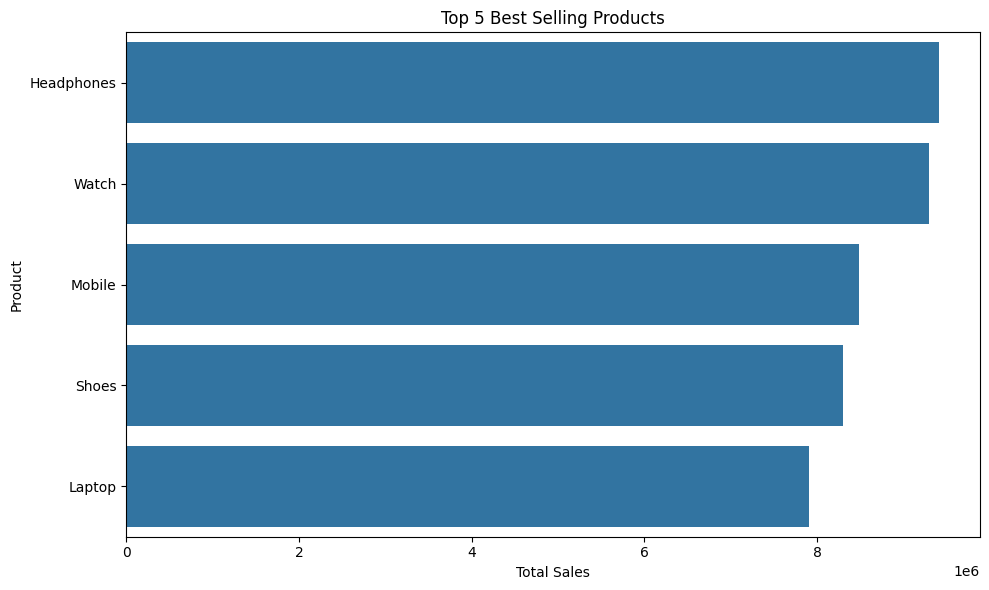

In [11]:
top5 = df.groupby("product")["Sales"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top5.values, y=top5.index)
plt.title("Top 5 Best Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Observation:
headphones are the highest-selling product.
Watch is  a close second.
Mobile, Shoes, and Laptop follow with slightly lower but still strong sales.
Electronics clearly dominate total revenue.

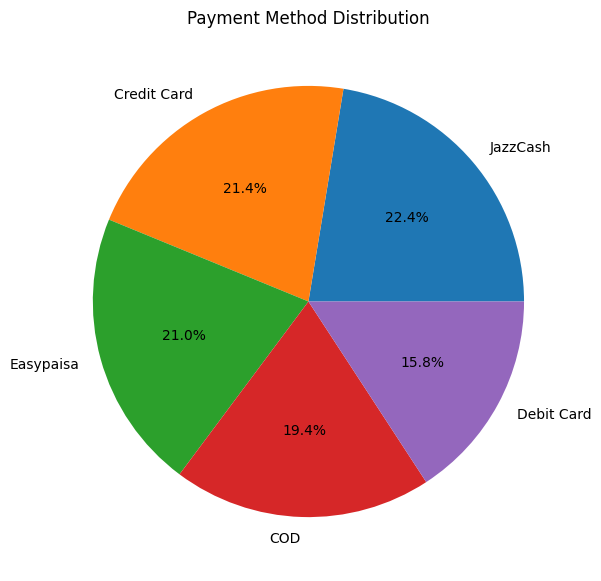

In [12]:
pm = df["payment_method"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(pm.values, labels=pm.index, autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.show()

Observation
JazzCash is the most commonly used payment method.
Credit Card and Easypaisa are almost equal in share.
COD (Cash on Delivery) is moderate.
Debit Card is the least preferred.
This indicates customers prefer mobile wallet payments over traditional methods.

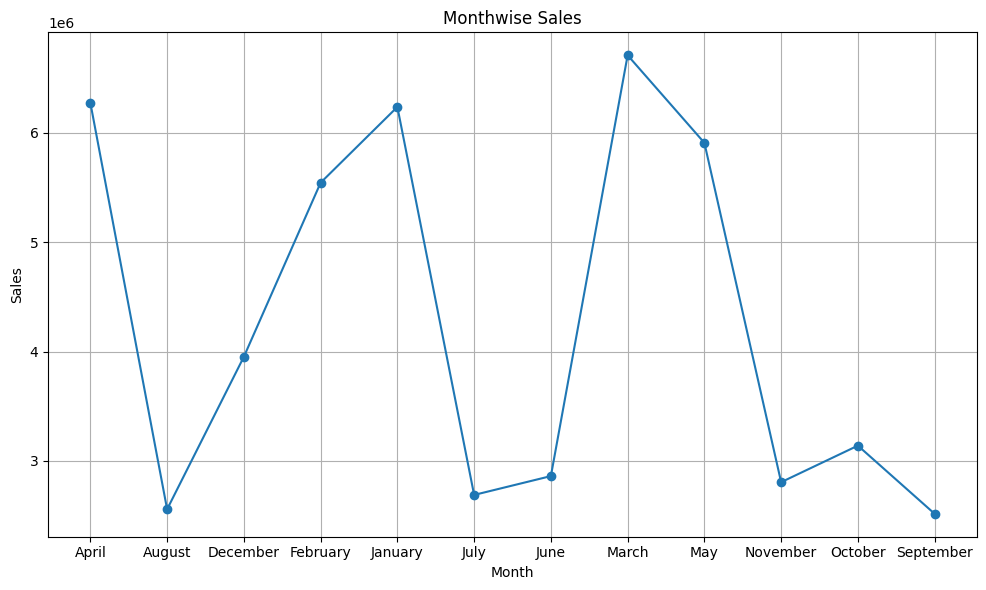

In [13]:
month_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10,6))
plt.plot(month_sales.index, month_sales.values, marker='o')
plt.title("Monthwise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

Observation
January and March show the highest sales peaks.
April and May are also strong months.
August, July, September, and November show the lowest sales—possibly off-season periods.
Sales pattern suggests seasonal fluctuations, maybe linked to festivals or promotions.

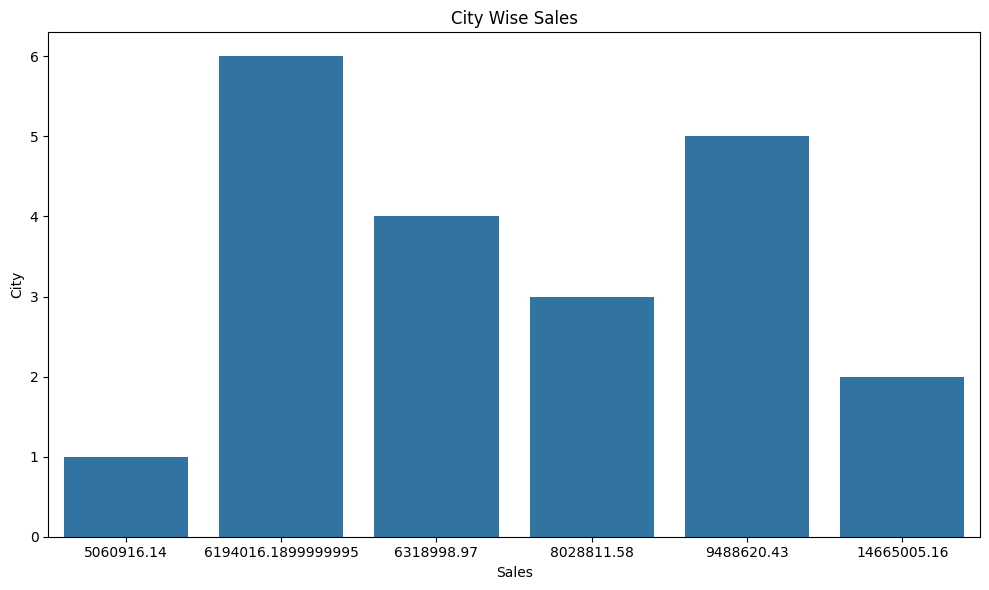

In [14]:
city_sales = df.groupby("City")["Sales"].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title("City Wise Sales")
plt.xlabel("Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()

Observation
One particular city (highest value on the bar) generated the largest amount of revenue.
Other cities show moderate sales distribution.
The difference in sales indicates either:
Different population sizes,
Store availability,
Regional demand preferences.

<Figure size 1200x700 with 0 Axes>

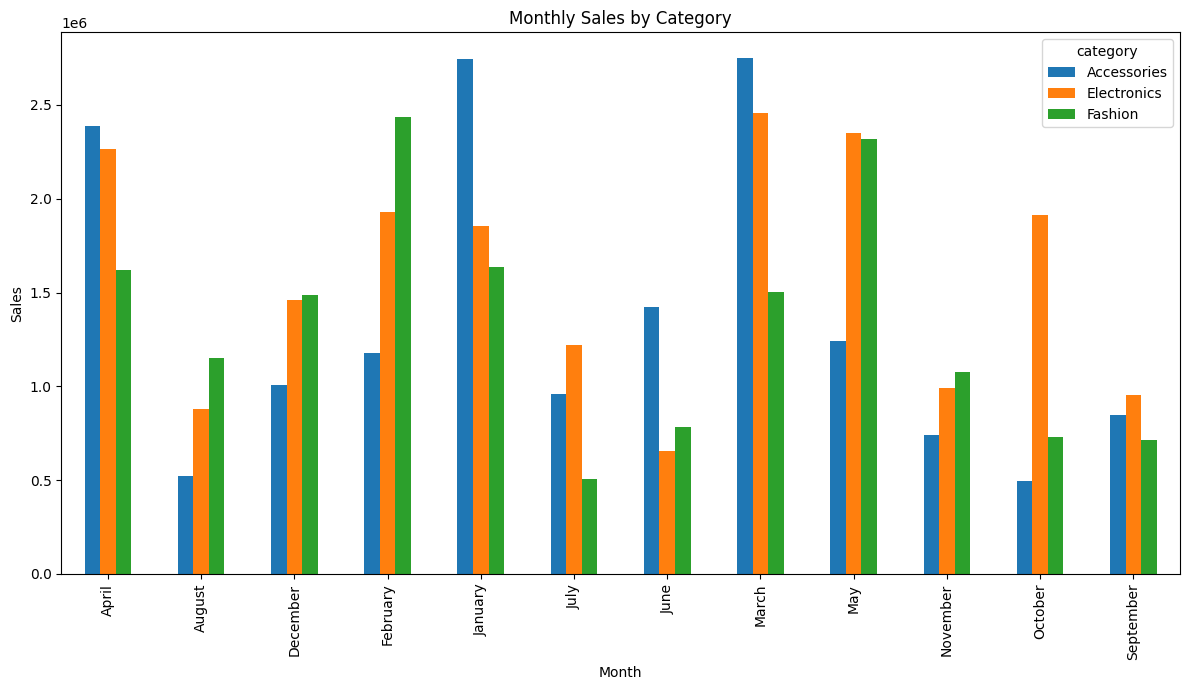

In [15]:
mc = df.groupby(["Month", "category"])["Sales"].sum().unstack()

plt.figure(figsize=(12,7))
mc.plot(kind="bar", figsize=(12,7))
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

Observation
Accessories show strong sales in January and March.
Electronics remain consistently high across most months.
Fashion has large spikes in February and May.
Categories do not move together—each peaks in different months.
Indicates different seasonal demand patterns across product categories.